In [89]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import interpolate
import glob
import math
import csv
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
mpl.rcParams.update(mpl.rcParamsDefault)

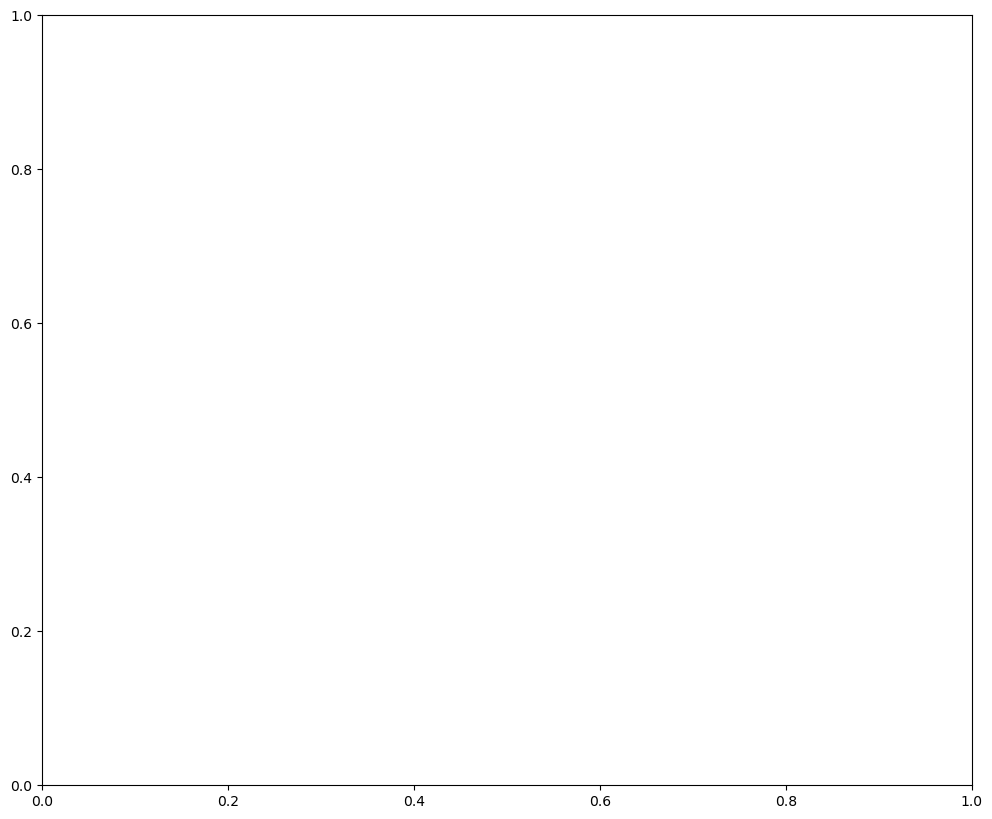

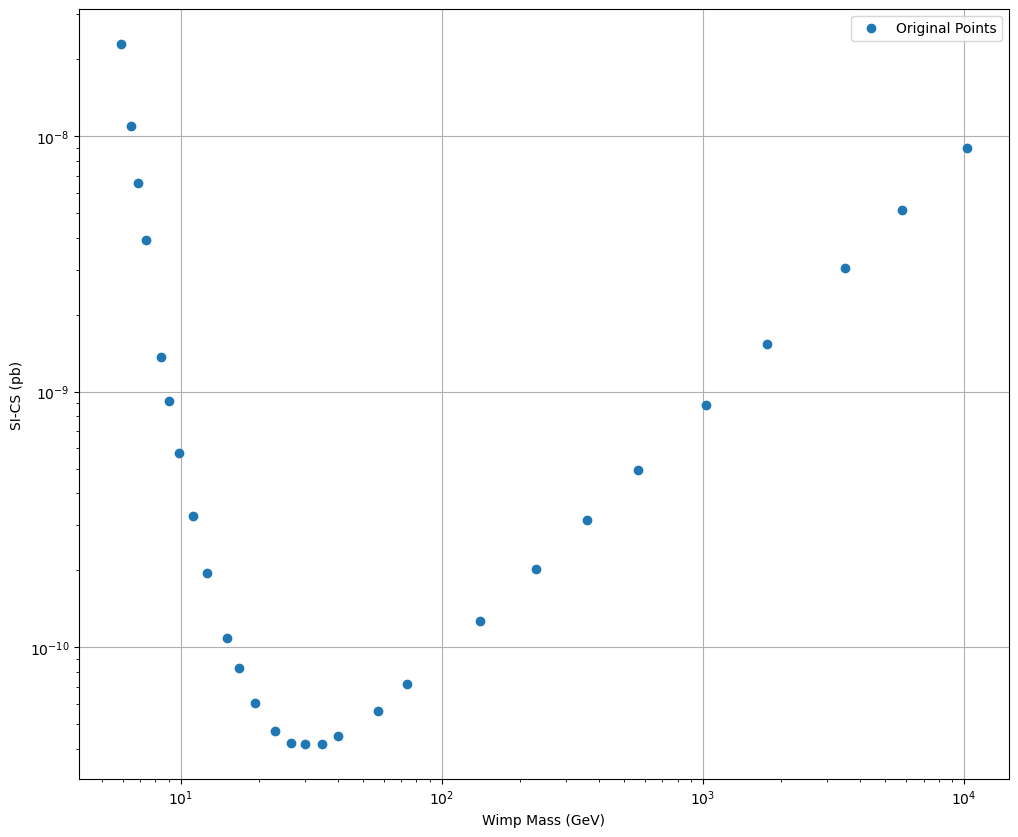

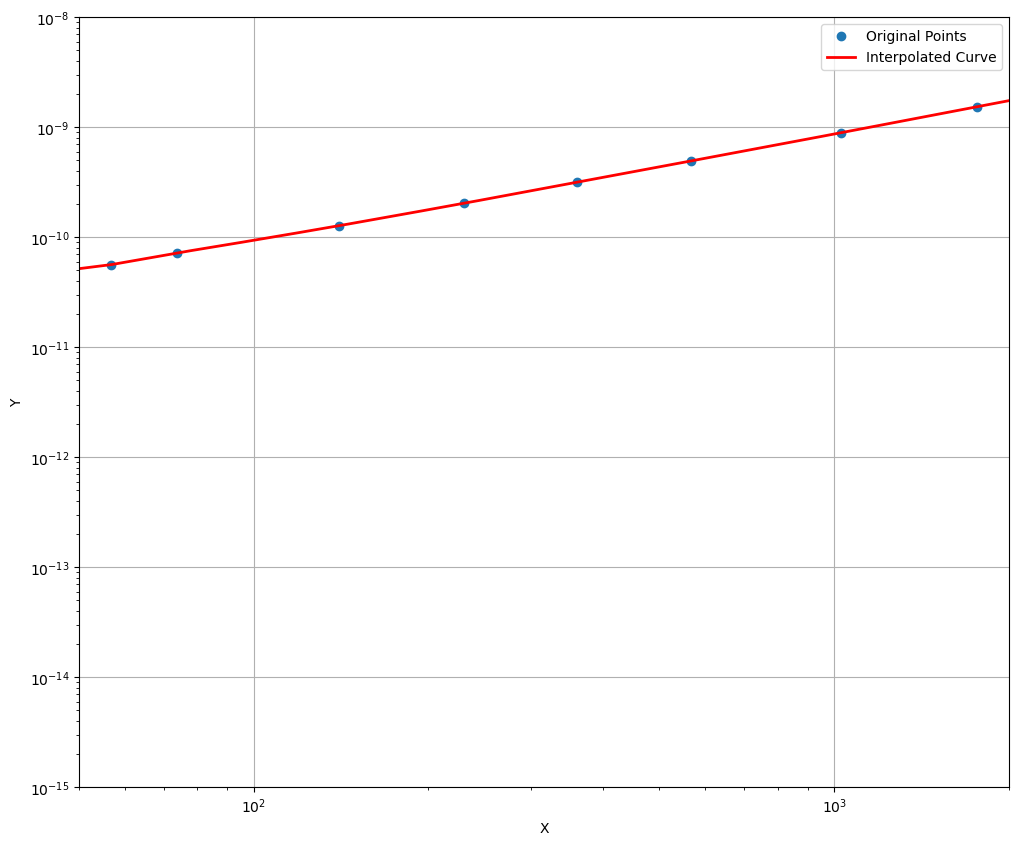

In [90]:
import numpy as np

# Function to read a text file and return two arrays
def read_text_file_to_arrays(filename):
    # Open the file and read lines
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    # Initialize empty lists for storing data
    col1_data = []
    col2_data = []
    
    # Iterate over each line, split by whitespace, and append to lists
    for line in lines:
        data = line.split()  # Assuming columns are separated by whitespace
        if len(data) >= 2:  # Ensure there are at least two columns per line
            col1_data.append(float(data[0]))  # Convert first column to float
            col2_data.append(float(data[1]))  # Convert second column to float
    
    # Convert lists to NumPy arrays
    col1_array = np.array(col1_data)
    col2_array = np.array(col2_data)
    
    return col1_array, col2_array

# Example usage
filename = 'Xenon1T-2018-limit.txt'
col1_array, col2_array = read_text_file_to_arrays(filename)

sigmasidatacm2 = col2_array

sigmasidatapb = col2_array*1e36

# Visualize both the original data points and the interpolated curve
plt.figure(figsize=(12, 10))
plt.plot(col1_array, sigmasidatapb, 'o', label='Original Points')
plt.ylabel('SI-CS (pb)')
plt.xlabel('Wimp Mass (GeV)')
plt.xscale('log')
plt.yscale('log')
#plt.xlim(5e1,2e3)
#plt.ylim(1e-15,1e-8)
plt.legend()
plt.grid(True)
plt.show()

f = interpolate.interp1d(col1_array, sigmasidatapb)

xnew = np.logspace(np.log10(40), np.log10(2000), 10000, base=10)

ynew = f(xnew)

# Visualize both the original data points and the interpolated curve
plt.figure(figsize=(12, 10))
plt.plot(col1_array, sigmasidatapb, 'o', label='Original Points')
plt.plot(xnew, ynew, '-', color='red', linewidth=2, label='Interpolated Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.xscale('log')
plt.yscale('log')
plt.xlim(5e1,2e3)
plt.ylim(1e-15,1e-8)
plt.legend()
plt.grid(True)
plt.show()

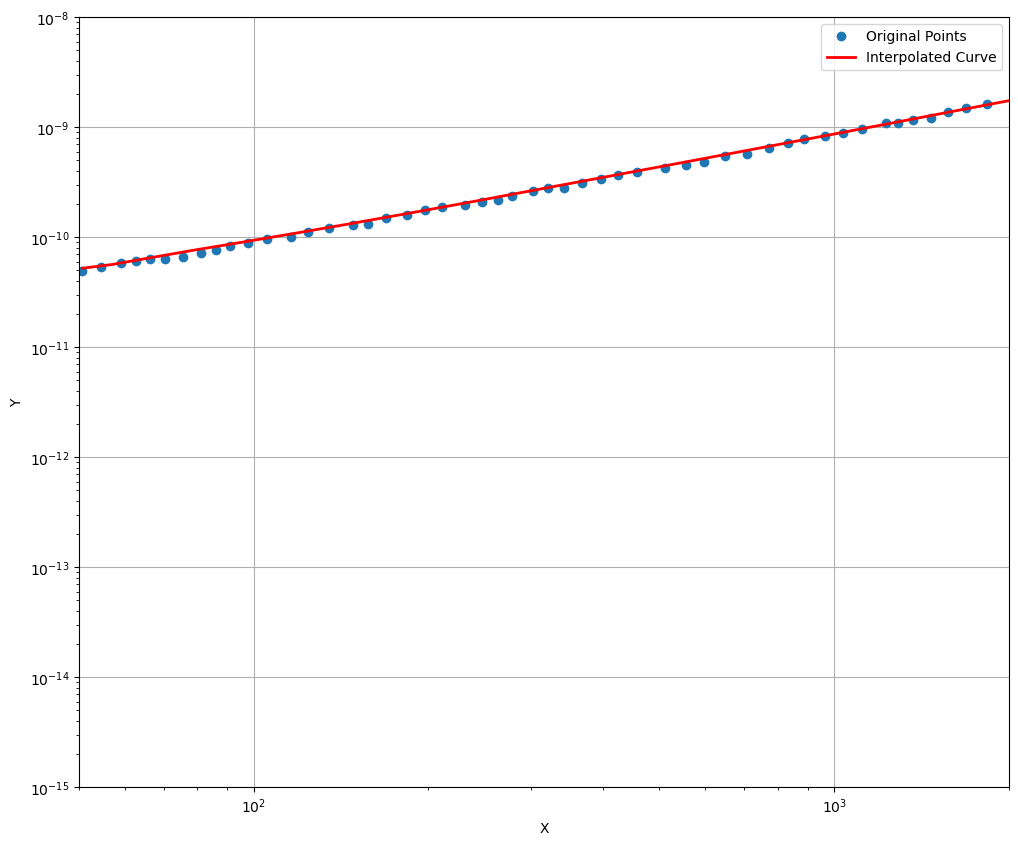

In [91]:
# Limite de deteccion directa
def load_csv(filename):
    data = []
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip header
        for row in csv_reader:
            data.append([float(val) for val in row])
    return data

# Load the CSV file
filename = 'plot-data.csv'
data = load_csv(filename)

# Extract X and Y values
x = [point[0] for point in data]
y = [point[1] for point in data]

# Interpolation

#f = interpolate.interp1d(x, y)

#xnew = np.logspace(np.log10(40), np.log10(2000), 10000, base=10)

xnew = np.logspace(np.log10(x[0]), np.log10(2000), 10000, base=10)

ynew = f(xnew)

# Visualize both the original data points and the interpolated curve
plt.figure(figsize=(12, 10))
plt.plot(x, y, 'o', label='Original Points')
plt.plot(xnew, ynew, '-', color='red', linewidth=2, label='Interpolated Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.xscale('log')
plt.yscale('log')
plt.xlim(5e1,2e3)
plt.ylim(1e-15,1e-8)
plt.legend()
plt.grid(True)
plt.show()

In [92]:
import csv
import numpy as np
import glob

# Specify the directory containing the CSV files
csv_dir = 'data_run1'

# Use glob to find all CSV files in the directory
csv_files = glob.glob(f'{csv_dir}/*.csv')

# Initialize an empty list to hold NumPy arrays
all_arrays = np.array([])

i = 0

# Loop through each CSV file
for file_path in csv_files:
    # Open the CSV file
    with open(file_path, mode='r') as file:
        # Create a CSV reader object
        csv_reader = csv.reader(file)
        
        # Extract the 12 columns from each row
        data = np.loadtxt(file_path, delimiter=',')

        if i==0:
            all_arrays = data
        
        else:
        # Convert the list of lists to a NumPy array and append it to the list of arrays
            all_arrays = np.concatenate([all_arrays, data],axis=0)
    i+=1
# Now, all_arrays contains NumPy arrays for each CSV file
# You can concatenate them if needed or process individually

In [93]:
print(all_arrays.shape)

(1155000, 12)


In [102]:
# Load the CSV file into a NumPy array

#data = np.loadtxt('output_Z4.csv', delimiter=',')

data = all_arrays

# Extraer parametros para probar acoples no imaginarios

mass_1 = data[:, 0]

mass_2 = data[:, 2]

ls1 = data[:, 5]

ls2 = data[:, 6]

# Extraer la columna de densidad de reliquia total
omega_column = data[:, -2] + data[:, -3]

# Condiciones faciles

cond1 = (0.11 < omega_column)

cond2 = (omega_column < 0.13)

cond3 = ((mass_1**2 - 1/2 * ls1 * 246**2) > 0)

cond4 = ((mass_2**2 - 1/2 * ls2 * 246**2) > 0)

cond5 = (mass_2 < mass_1)

# Condiciones complicadas

# Deteccion indirecta

Mh = 125

vev = 246

Gamma1 = (mass_1<Mh) * 2 * ls1**2 * vev**2 /(32*np.pi*Mh) * np.sqrt(1 - 4*mass_1**2/Mh**2 + 0j)

Gamma2 = (mass_2<Mh) * ls2**2 * vev**2 /(32*np.pi*Mh) * np.sqrt(1 - 4*mass_2**2/Mh**2 + 0j)

cond6 = (Gamma1 + Gamma2 <= 0.13)

# Deteccion directa

mp = 0.938

fp = 0.3 

mu1 = mass_1*Mh/(mass_1+Mh)

mu2 = mass_2*Mh/(mass_2+Mh)

sigmaSI1 = ls1**2 * mu1**2 * mp**2 * fp**2/(2*np.pi*Mh**4*mass_1**2)

sigmaSI1pb = sigmaSI1/(2.568e-9)

sigmaSI2 = ls2**2 * mu2**2 * mp**2 * fp**2/(2*np.pi*Mh**4*mass_2**2)

sigmaSI2pb = sigmaSI2/(2.568e-9)

chi1 = data[:,-3]/(data[:, -2] + data[:, -3])

chi2 = data[:,-2]/(data[:, -2] + data[:, -3])

schi1 = sigmaSI1pb*chi1

schi2 = sigmaSI2pb*chi2

cond7 = (schi1 <= f(mass_1))

cond8 = (schi2 <= f(mass_2))


condtot = cond1*cond2*cond3*cond4*cond5*cond6*cond7*cond8
#condtot = True

# Filtrar los valores que esten en el intervalo
data_filtered = data[condtot, :]
#data_filtered = data

schifiltered1 = schi1[condtot]

schifiltered2 = schi2[condtot]

In [103]:
print(data_filtered.shape)

(31, 12)


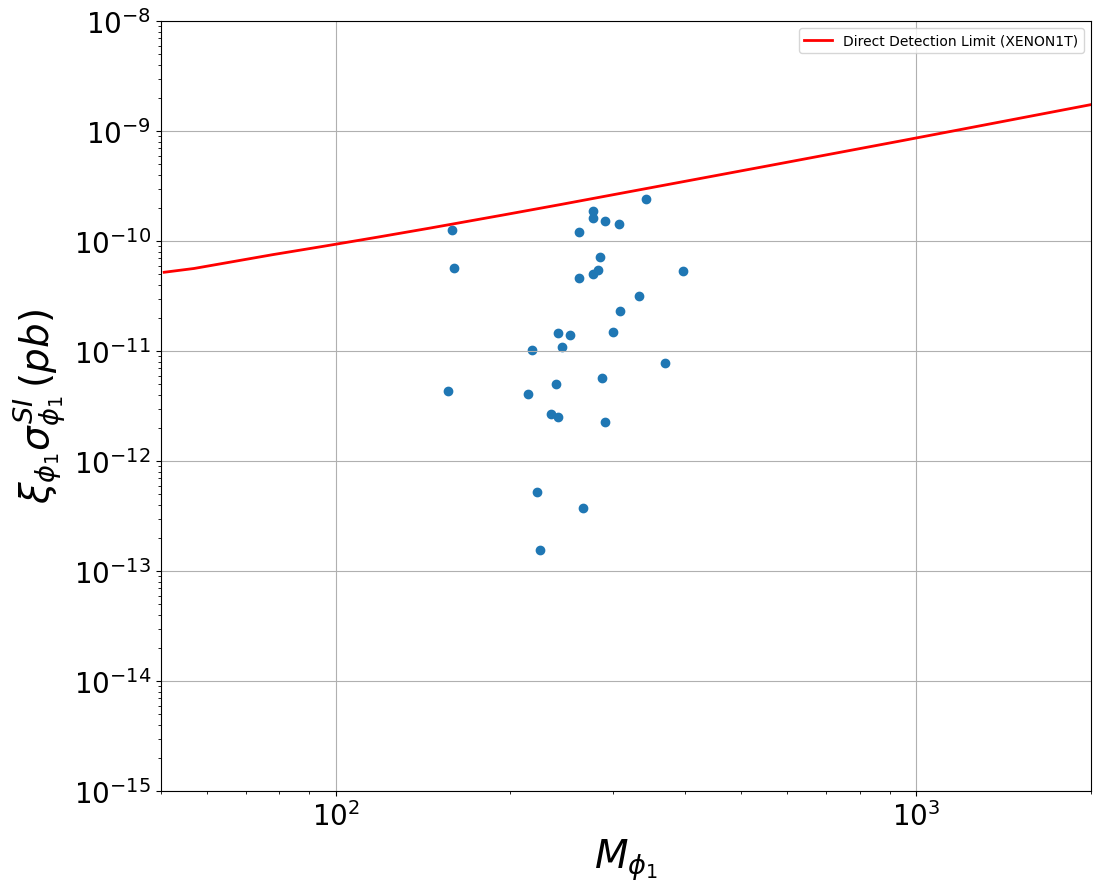

In [104]:
#Sigma Chi 1

plt.figure(figsize=(12, 10))
plt.scatter(data_filtered[:,0],schifiltered1)
plt.plot(xnew, ynew, '-', color='red', linewidth=2, label='Direct Detection Limit (XENON1T)')
plt.ylabel(r"$\xi_{\phi_1} \sigma^{SI}_{\phi_1} \, (pb)$", size=28)
plt.xlabel(r"$M_{\phi_1}$", size=28)
plt.xscale('log')
plt.yscale('log')
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlim(5e1,2e3)
plt.ylim(1e-15,1e-8)
plt.legend()
plt.grid(True)
plt.savefig("relicdensity3.png")
plt.show()

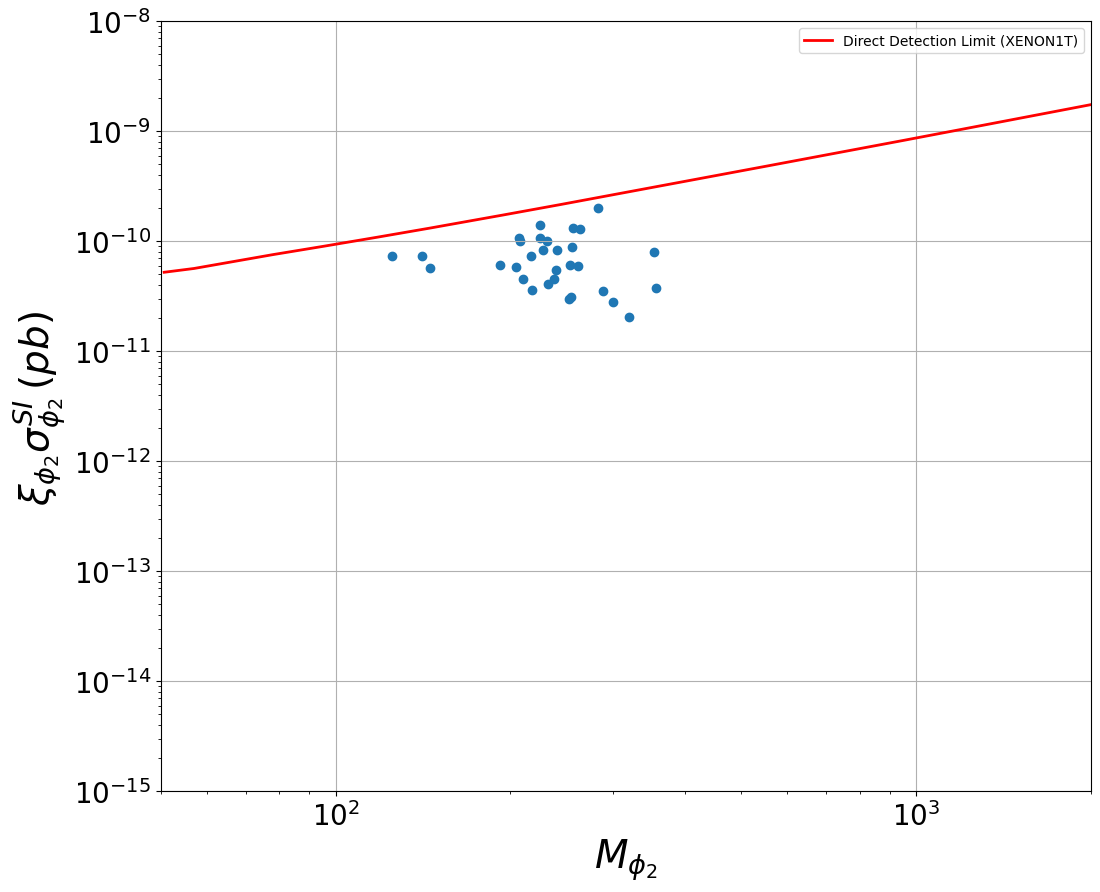

In [105]:
#Sigma Chi 2

plt.figure(figsize=(12, 10))
plt.scatter(data_filtered[:,2],schifiltered2)
plt.plot(xnew, ynew, '-', color='red', linewidth=2, label='Direct Detection Limit (XENON1T)')
plt.ylabel(r"$\xi_{\phi_2} \sigma^{SI}_{\phi_2} \, (pb)$ ", size=28)
plt.xlabel(r"$M_{\phi_2}$", size=28)
plt.xscale('log')
plt.yscale('log')
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlim(5e1,2e3)
plt.ylim(1e-15,1e-8)
plt.legend()
plt.grid(True)
plt.savefig("relicdensity4.png")
plt.show()

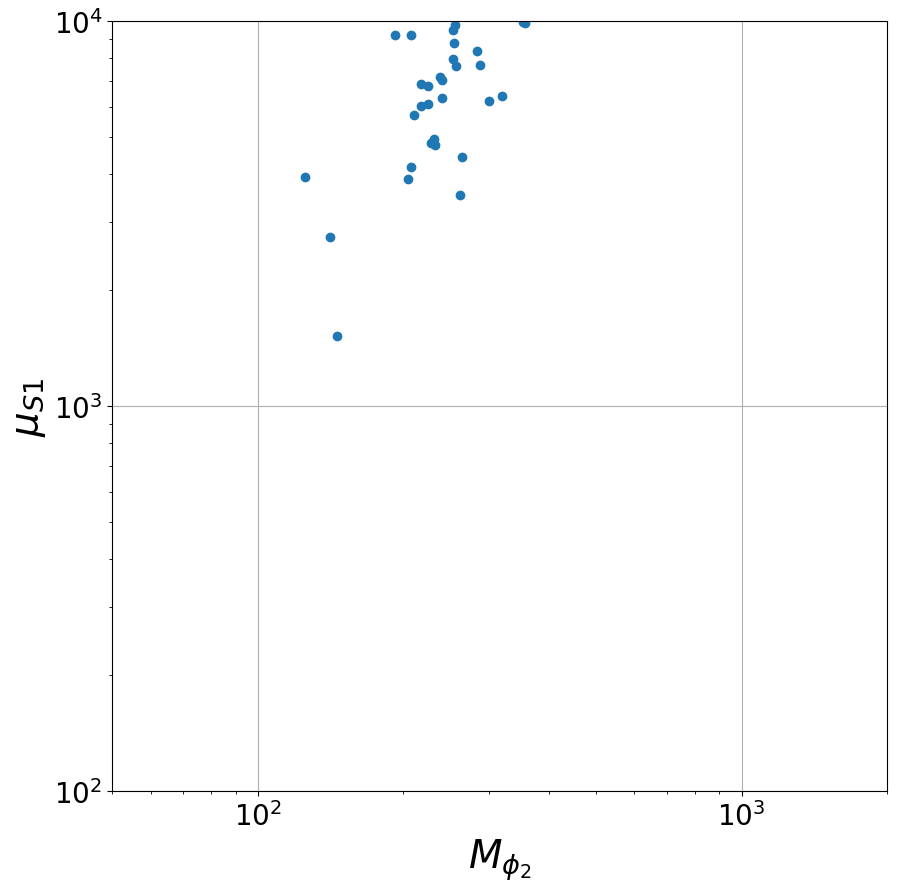

In [106]:
plt.figure(figsize=(10,10))
plt.scatter(data_filtered[:,2],data_filtered[:,7])
plt.xscale('log')
plt.yscale('log')

plt.xticks(size=20)
plt.yticks(size=20)
plt.ylabel(r"$\mu_{S1}$", size=28)
plt.xlabel(r"$M_{\phi_2}$", size=28)
plt.xlim(5e1,2e3)
plt.ylim(1e2,1e4)
plt.grid()
plt.savefig("relicdensity0.png")
plt.show()

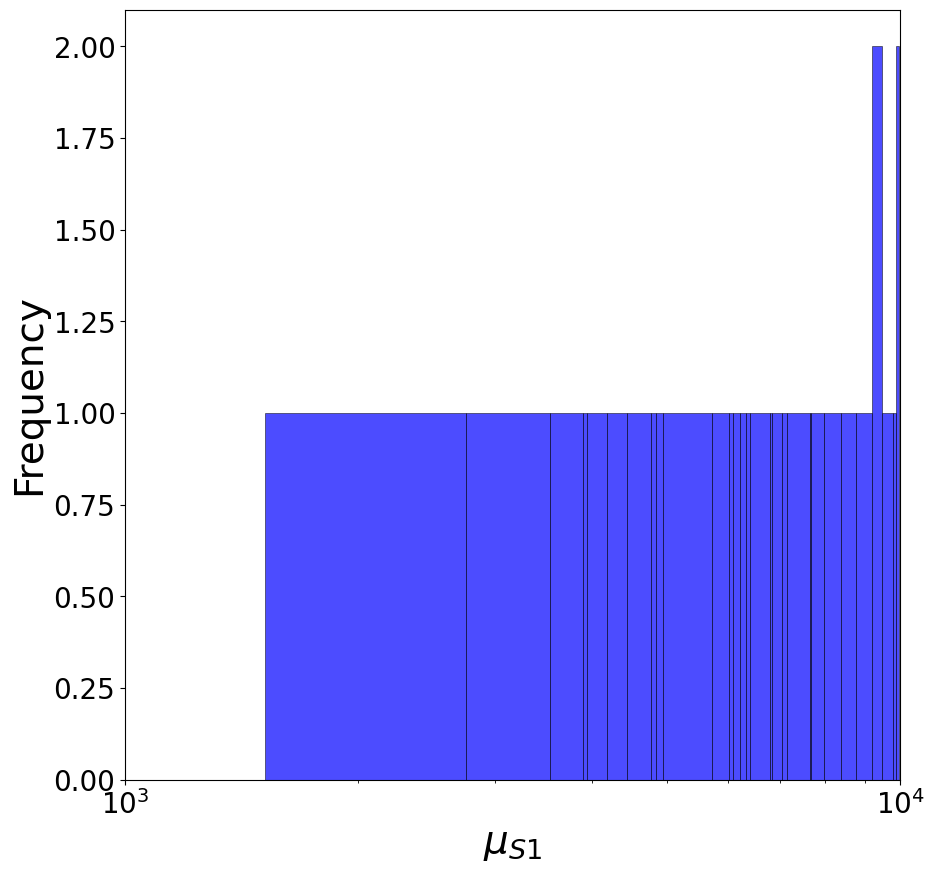

In [107]:
plt.figure(figsize=(10, 10)) 

unique_values = np.unique(data_filtered[:, 7])

plt.hist(data_filtered[:, 7], bins=unique_values, color='blue', alpha=0.7, edgecolor='black', linewidth=0.5)  
plt.xlabel(r"$\mu_{S1}$", size=28)  
plt.ylabel('Frequency', size=28)  
plt.grid()

plt.xlim([1e3,1e4])

plt.xticks(size=20)
plt.yticks(size=20)
plt.grid()

plt.xscale('log')

plt.savefig("histogram.png")  
plt.show()

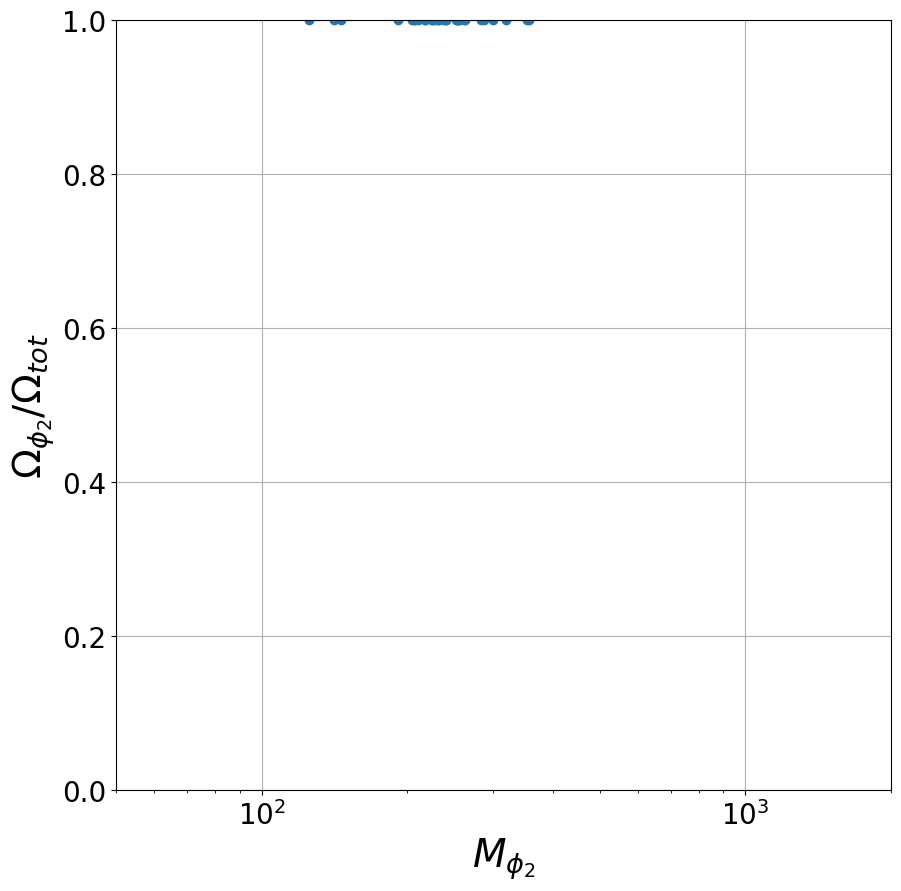

In [108]:
plt.figure(figsize=(10,10))
plt.scatter(data_filtered[:,2],data_filtered[:,-2]/(data_filtered[:, -2] + data_filtered[:, -3]))
plt.xscale('log')

plt.xticks(size=20)
plt.yticks(size=20)
plt.ylabel(r"$\Omega_{\phi_2} / \Omega_{tot}$", size=28)
plt.xlabel(r"$M_{\phi_2}$", size=28)
plt.xlim(5e1,2e3)
plt.ylim(0,1)
plt.grid()
plt.savefig("relicdensity1.png")
plt.show()

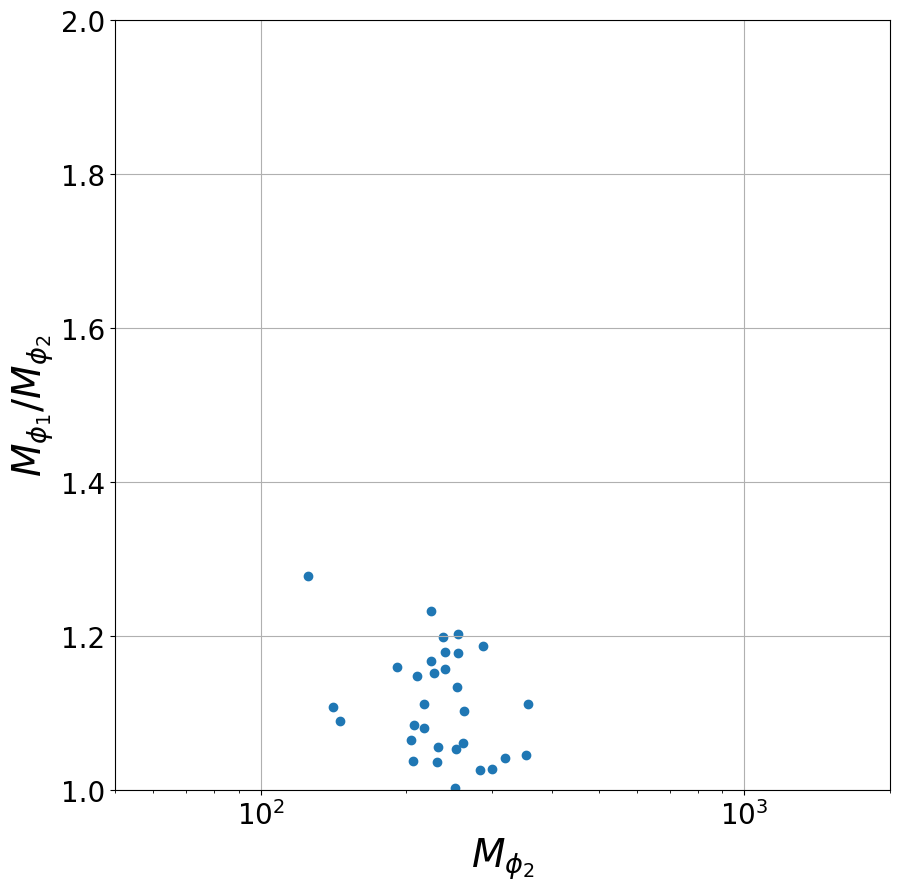

In [109]:
plt.figure(figsize=(10,10))
plt.scatter(data_filtered[:,2],data_filtered[:,0]/(data_filtered[:,2]))
plt.xscale('log')

plt.xticks(size=20)
plt.yticks(size=20)
plt.ylabel(r"$M_{\phi_1} / M_{\phi_2} $", size=28)
plt.xlabel(r"$M_{\phi_2}$", size=28)
plt.xlim(5e1,2e3)
plt.ylim(1,2)
plt.grid()
plt.savefig("relicdensity2.png")
plt.show()